WEEK 1

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
import math

In [14]:
# '''
# Functions 
# '''
# def function_1(x, Y):
#     return  -2 * Y[0] + Y[1] - 2 * Y[2]

# def function_2(x, Y):
#     return Y[0] - 2 * Y[1] + 2 * Y[2]

# def function_3(x, Y):
#     return 3 * Y[0] - 3 * Y[1] + 5 * Y[2]

# def f(x, Y):
#     return np.array([function_1(x, Y), function_2(x, Y), function_3(x, Y)])

# N = 3  # Number of Functions

# x0, x1 = 0, 1
# Y0 = np.array([-2, 2, 4])

In [15]:
def function_1(x, Y):
    return  Y[1]

def function_2(x, Y):
    return -40*Y[1] - 4000*Y[0] + 24

def f(x, Y):
    return np.array([function_1(x, Y), function_2(x, Y)])

N = 2  # Number of Functions

x0, x1 = 0, 0.35
Y0 = np.array([0, 0])

In [16]:
def partial_derivative(g, Y, i, epsilon = 1e-6):
    # del g/del yi
    g1 = g(Y)
    Y[i] += epsilon
    g2 = g(Y)
    return (g2 - g1) / epsilon

def trapezoidal_rule(Y, x_n, Y_n, h):
    return Y_n + h / 2 * (f(x_n + h, Y) + f(x_n, Y_n)) - Y

def newton_raphson(Y_n, x_n, h, iterations = 10000, tolerance = 1e-6):
    Y_k = Y_n - h*f(x_n, Y_n)
    J_k = np.zeros((N, N))
    # J_k
    # J_k[i, j] = del Fi / del yj
    error = 1
    # print("starting Newton Rapson")
    while iterations and error > tolerance:
        for i in range(N):
            for j in range(N):
                def Fi(Y_):
                    return trapezoidal_rule(Y_, x_n, Y_n, h)[i]
                J_k[i, j] = partial_derivative(Fi, Y_k, j)
        # print(" J = \n",J_k)
        # print(" y* => ",Y_k)
        Y_k = Y_k - np.linalg.inv(J_k) @ trapezoidal_rule(Y_k, x_n, Y_n, h)
        iterations -= 1
        error = np.linalg.norm(trapezoidal_rule(Y_k, x_n, Y_n, h))
    return Y_k

In [17]:
def equation_solver(x0, x1, num_points, Y0, N):
    h = (x1 - x0) / num_points
    Y_n = Y0
    x_n = x0
    '''
    Y_(n + 1) = Y_(n) + h/2*(f(x_n + h, Y_(n + 1)) + f(x_n, Y_n))
    '''
    output = np.zeros((N, num_points + 1))
    for i in range(N):
        output[i][0] = Y_n[i]
    
    # print(Y_n)
    for n in range(1, num_points + 1):
        '''
        Y_(n + 1) = Y_(n) + h/2*(f(x_n + h, Y_(n + 1)) + f(x_n, Y_n))
        Now we have to solve Y_(n + 1) [vector of size Nx1]
        Newton-Rapson
        F(Y_(n + 1)) = Y_(n) + h/2*(f(x_n + h, Y_(n + 1)) + f(x_n, Y_n)) - Y_(n + 1) 
        Find Y_(n + 1) = [y1, y2, ..., yN] s.t
        F(Y_(n + 1)) = 0
        '''
        # print("Y = ",Y_n)
        Y_n = newton_raphson(Y_n, x_n, h)
        x_n += h
        for i in range(N):
            output[i][n] = Y_n[i]

    return output


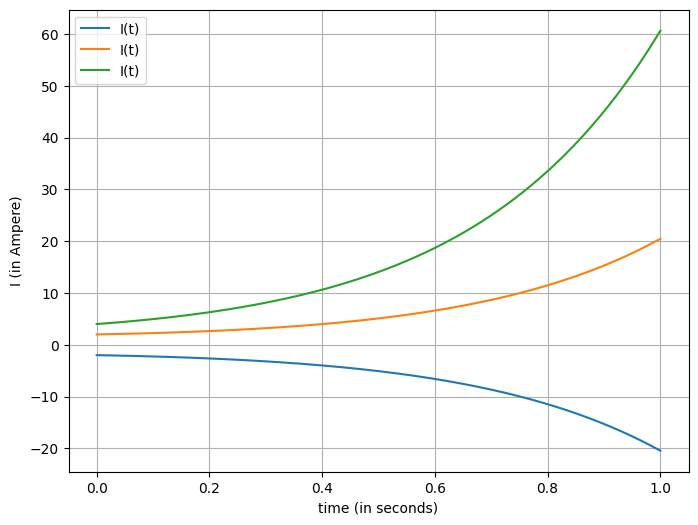

In [18]:
num_points = 10000
x_array = np.linspace(x0, x1, num_points + 1)
y_array = equation_solver(x0, x1, num_points, Y0, N)
plt.figure(figsize=(8, 6))
for i in range(N):
    plt.plot(x_array, y_array[i], label=f'I(t)')
    plt.xlabel('time (in seconds)')
    plt.ylabel('I (in Ampere)')
    plt.legend()
    plt.grid(True)
    plt.show()